In [1]:
import numpy as np
import os
from astropy.io import fits
import matplotlib.pyplot as plt

import paco.processing.paco as p
import paco.processing.fullpaco as f_paco
import paco.processing.fastpaco as fastPACO

from paco.util.util import *
import cv2 as cv2
from astropy.convolution import convolve, Gaussian2DKernel, AiryDisk2DKernel
from astropy.modeling.models import Gaussian2D

from matplotlib.colors import LogNorm 
#%matplotlib notebook


In [2]:
path_data = os.path.dirname(os.getcwd()) + '/PACO/testData/HCI_data/'
print(path_data)
angles = np.loadtxt(os.path.join(path_data, "parang.dat"))
angles = angles#-angles[0]
print(len(angles))


/home/evert/Documents/PACO/PACO/testData/HCI_data/
340


(340, 100, 100)
(100, 100)


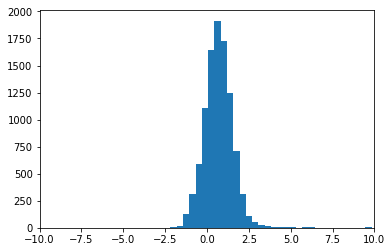

(100, 100)


In [30]:
data = fits.getdata(os.path.join(path_data, "images.fits"))[:,:-1,:-1]
print(np.shape(data))
#fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
#im = ax.imshow(np.median(data,axis=0)[30:70,30:70])
plt.figure()
print(np.mean(data,axis=0).shape)
plt.hist(np.mean(data,axis=0).flatten(),bins =150)
plt.xlim(-10,10)
plt.show()
print(np.shape(data[3]))
#fig.colorbar(im,ax = ax)

## Full PACO 

In [4]:
#fp = f_paco.FullPACO(patch_size = 49)

In [5]:
#fp.setImageSequence(rot_images)
#a,b = fp.PACO(angles,scale = 1)

In [6]:
#phi0s = np.array([[30,30]])
#a,b = fp.PACO(angles)


In [7]:
#img = b/np.sqrt(a)
#plt.imshow(img, origin='lower')

#clb = plt.colorbar()
#clb.ax.set_title('SNR')

In [8]:
#plt.imshow(1/np.sqrt(a), origin='lower')

#clb = plt.colorbar()

In [9]:
#plt.imshow(b.T, origin='lower')

#clb = plt.colorbar()

## Fast PACO

In [ ]:
psf = np.median(data,axis=0)[46:55,46:55]
psf = psf/np.sum(psf)

fp = fastPACO.FastPACO(image_stack = data,
                       psf = psf
                       angles = angles,
                       psf_rad = 4,
                       px_scale = 1,
                       res_scale = 1)

#%prun fp.PACO(angles,scale = 1, model_name=psftemplate_model, params={"psf_template":s})
a,b = fp.PACO(cpu = 1,model_name = psfTemplateModel,model_params = {"psfTemplateModel":psf})

Precomputing Statistics...
Running PACO...


In [ ]:
img = b/np.sqrt(a)
plt.imshow(img, origin='lower')
coords = fp.thresholdDetection(img,4.9)
plt.plot(coords[:,0],coords[:,1],'r.')
clb = plt.colorbar()
clb.ax.set_title('SNR')

In [ ]:
plt.imshow(b.T, origin='lower')

clb = plt.colorbar()
clb.ax.set_title('Flux')

In [ ]:
plt.imshow((1/np.sqrt(a)).T, origin='lower', vmax=.25)

clb = plt.colorbar()

## PCA

In [ ]:
data_pca = fits.getdata(os.path.join(path_data, "PSFsub_mask0.05.fits"))

In [ ]:
plt.imshow(data_pca[6], origin='lower')

clb = plt.colorbar()
